# Project: Extract and Analyze Cricketer Data from Wikipedia


Objective:
The goal of this project is to extract cricketer profiles from Wikipedia and analyze various statistics such as nationality, batting average, and the number of centuries. The results will be visualized to provide insights.

### 1. Importing Libraries

In [85]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [86]:
# Step 1: Define the URL
url = 'https://en.wikipedia.org/wiki/List_of_India_Test_cricketers'

In [87]:
# Step 2: Send a GET request
response = requests.get(url)

In [88]:
# Step 3: Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

In [89]:
# Step 4: Find the table containing the cricketer data
table = soup.find('table', {'class': 'wikitable'})


In [90]:
# Step 5: Extract table headers i.e column names
headers = [header.text.strip() for header in table.find_all('th')]
print(headers)

['Indian Test cricketers', 'Batting', 'Bowling', 'Fielding', 'Cap', 'Name', 'First', 'Last', 'Mat', 'Runs', 'HS', 'Avg', '100/50', 'Wkt', 'BBI', 'Ave', '5/10 wicket', 'Ca', 'St']


In [93]:
# Step 6: Extract the rows
rows = table.find_all('tr')  # Find all rows in the table
data = []  # Initialize an empty list to store the table data

In [94]:
for row in rows[1:]:
    cols = [col.text.strip() for col in row.find_all('td')]
    # Pad with None if there are fewer columns
    cols += [None] * (len(headers) - len(cols))
    data.append(cols)
df = pd.DataFrame(data, columns=headers)
print(df.head())

  Indian Test cricketers        Batting Bowling Fielding   Cap  Name First  \
0                   None           None    None     None  None  None  None   
1                      1     Amar Singh    1932     1936     7   292    51   
2                      2  Sorabji Colah    1932     1933     2    69    31   
3                      3  Jahangir Khan    1932     1936     4    39    13   
4                      4     Lall Singh    1932     1932     1    44    29   

    Last   Mat  Runs    HS    Avg 100/50   Wkt   BBI   Ave 5/10 wicket    Ca  \
0   None  None  None  None   None   None  None  None  None        None  None   
1  22.46   0/1    28  7/86  30.64    2/0     3     0  None        None  None   
2  17.25   0/0     -     -      -    -/-     2     0  None        None  None   
3   5.57   0/0     4  4/60  63.75    0/0     4     0  None        None  None   
4  22.00   0/0     -     -      -    -/-     1     0  None        None  None   

     St  
0  None  
1  None  
2  None  
3  None  


In [95]:
import pandas as pd

# Check if data is non-empty and headers are valid
if data and headers:
    try:
        # Create the DataFrame
        df = pd.DataFrame(data, columns=headers)
        print(df.head())
    except ValueError as e:
        # Handle the case where there's a mismatch
        print(f"Error creating DataFrame: {e}")
else:
    print("No data available to create DataFrame.")


  Indian Test cricketers        Batting Bowling Fielding   Cap  Name First  \
0                   None           None    None     None  None  None  None   
1                      1     Amar Singh    1932     1936     7   292    51   
2                      2  Sorabji Colah    1932     1933     2    69    31   
3                      3  Jahangir Khan    1932     1936     4    39    13   
4                      4     Lall Singh    1932     1932     1    44    29   

    Last   Mat  Runs    HS    Avg 100/50   Wkt   BBI   Ave 5/10 wicket    Ca  \
0   None  None  None  None   None   None  None  None  None        None  None   
1  22.46   0/1    28  7/86  30.64    2/0     3     0  None        None  None   
2  17.25   0/0     -     -      -    -/-     2     0  None        None  None   
3   5.57   0/0     4  4/60  63.75    0/0     4     0  None        None  None   
4  22.00   0/0     -     -      -    -/-     1     0  None        None  None   

     St  
0  None  
1  None  
2  None  
3  None  


In [96]:
# Print the length of headers and the first few rows of data
print(f"Number of headers: {len(headers)}")
print(f"Headers: {headers}")
for i, row in enumerate(data[:5]):
    print(f"Row {i} length: {len(row)}")
    print(row)


Number of headers: 19
Headers: ['Indian Test cricketers', 'Batting', 'Bowling', 'Fielding', 'Cap', 'Name', 'First', 'Last', 'Mat', 'Runs', 'HS', 'Avg', '100/50', 'Wkt', 'BBI', 'Ave', '5/10 wicket', 'Ca', 'St']
Row 0 length: 19
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Row 1 length: 19
['1', 'Amar Singh', '1932', '1936', '7', '292', '51', '22.46', '0/1', '28', '7/86', '30.64', '2/0', '3', '0', None, None, None, None]
Row 2 length: 19
['2', 'Sorabji Colah', '1932', '1933', '2', '69', '31', '17.25', '0/0', '-', '-', '-', '-/-', '2', '0', None, None, None, None]
Row 3 length: 19
['3', 'Jahangir Khan', '1932', '1936', '4', '39', '13', '5.57', '0/0', '4', '4/60', '63.75', '0/0', '4', '0', None, None, None, None]
Row 4 length: 19
['4', 'Lall Singh', '1932', '1932', '1', '44', '29', '22.00', '0/0', '-', '-', '-', '-/-', '1', '0', None, None, None, None]


In [97]:
cleaned_data = []
for row in rows[1:]:
    columns = row.find_all('td')
    row_data = [col.text.strip() for col in columns]
    # Handle rows with too many columns or too few columns
    if len(row_data) == len(headers):
        cleaned_data.append(row_data)
    else:
        print(f"Row with column mismatch: {row_data}")

# Use cleaned_data to create the DataFrame
if cleaned_data:
    df = pd.DataFrame(cleaned_data, columns=headers)
    print(df.head())
else:
    print("No valid rows found.")


Row with column mismatch: []
Row with column mismatch: ['1', 'Amar Singh', '1932', '1936', '7', '292', '51', '22.46', '0/1', '28', '7/86', '30.64', '2/0', '3', '0']
Row with column mismatch: ['2', 'Sorabji Colah', '1932', '1933', '2', '69', '31', '17.25', '0/0', '-', '-', '-', '-/-', '2', '0']
Row with column mismatch: ['3', 'Jahangir Khan', '1932', '1936', '4', '39', '13', '5.57', '0/0', '4', '4/60', '63.75', '0/0', '4', '0']
Row with column mismatch: ['4', 'Lall Singh', '1932', '1932', '1', '44', '29', '22.00', '0/0', '-', '-', '-', '-/-', '1', '0']
Row with column mismatch: ['5', 'Naoomal Jeoomal', '1932', '1934', '3', '108', '43', '27.00', '0/0', '2', '1/4', '34.00', '0/0', '0', '0']
Row with column mismatch: ['6', 'Janardan Navle', '1932', '1933', '2', '42', '13', '10.50', '0/0', '-', '-', '-', '-/-', '1', '0']
Row with column mismatch: ['7', 'C. K. Nayudu', '1932', '1936', '7', '350', '81', '25.00', '0/2', '9', '3/40', '42.88', '0/0', '4', '0']
Row with column mismatch: ['8', 'Na

In [98]:
# Define df within a block
if cleaned_data:
    df = pd.DataFrame(cleaned_data, columns=headers)
    print(df.head())
else:
    print("No valid rows found.")

# Make sure to use df here, or you will get NameError
try:
    print(df.describe())
except NameError:
    print("df is not defined.")


No valid rows found.
       Indian Test cricketers     Batting Bowling Fielding  Cap Name First  \
count                     314         314     314      314  314  314   314   
unique                    314         314      74       71   75  239   183   
top                         1  Amar Singh    1952     2024    1    0     6   
freq                        1           1      12       18   51    9     8   

       Last  Mat Runs   HS  Avg 100/50  Wkt  BBI  Ave 5/10 wicket   Ca   St  
count   314  314  314  314  314    314  314  314    0           0    0    0  
unique  243   70   75  152  174     28   65   16    0           0    0    0  
top       -  0/0    -    -    -    0/0    0    0  NaN         NaN  NaN  NaN  
freq     17  160   77  132  132    165   62  283  NaN         NaN  NaN  NaN  


In [99]:
if table is not None:
    headers = [header.text.strip() for header in table.find_all('th')]
    rows = table.find_all('tr')
    cleaned_data = []
    
    for row in rows[1:]:
        columns = row.find_all('td')
        row_data = [col.text.strip() for col in columns]
        if len(row_data) == len(headers):
            cleaned_data.append(row_data)
        else:
            print(f"Row with column mismatch: {row_data}")
    
    if cleaned_data:
        try:
            df = pd.DataFrame(cleaned_data, columns=headers)
            print(df.head())
        except ValueError as e:
            print(f"Error creating DataFrame: {e}")
    else:
        print("No valid rows found.")
else:
    print("Table not found.")


Row with column mismatch: []
Row with column mismatch: ['1', 'Amar Singh', '1932', '1936', '7', '292', '51', '22.46', '0/1', '28', '7/86', '30.64', '2/0', '3', '0']
Row with column mismatch: ['2', 'Sorabji Colah', '1932', '1933', '2', '69', '31', '17.25', '0/0', '-', '-', '-', '-/-', '2', '0']
Row with column mismatch: ['3', 'Jahangir Khan', '1932', '1936', '4', '39', '13', '5.57', '0/0', '4', '4/60', '63.75', '0/0', '4', '0']
Row with column mismatch: ['4', 'Lall Singh', '1932', '1932', '1', '44', '29', '22.00', '0/0', '-', '-', '-', '-/-', '1', '0']
Row with column mismatch: ['5', 'Naoomal Jeoomal', '1932', '1934', '3', '108', '43', '27.00', '0/0', '2', '1/4', '34.00', '0/0', '0', '0']
Row with column mismatch: ['6', 'Janardan Navle', '1932', '1933', '2', '42', '13', '10.50', '0/0', '-', '-', '-', '-/-', '1', '0']
Row with column mismatch: ['7', 'C. K. Nayudu', '1932', '1936', '7', '350', '81', '25.00', '0/2', '9', '3/40', '42.88', '0/0', '4', '0']
Row with column mismatch: ['8', 'Na

In [100]:
# Ensure headers and data lengths match
if headers and all(len(row) == len(headers) for row in data):
    try:
        df = pd.DataFrame(data, columns=headers)
        print(df.head())
    except ValueError as e:
        print(f"Error creating DataFrame: {e}")
else:
    print("Headers and data lengths do not match. DataFrame not created.")

  Indian Test cricketers        Batting Bowling Fielding   Cap  Name First  \
0                   None           None    None     None  None  None  None   
1                      1     Amar Singh    1932     1936     7   292    51   
2                      2  Sorabji Colah    1932     1933     2    69    31   
3                      3  Jahangir Khan    1932     1936     4    39    13   
4                      4     Lall Singh    1932     1932     1    44    29   

    Last   Mat  Runs    HS    Avg 100/50   Wkt   BBI   Ave 5/10 wicket    Ca  \
0   None  None  None  None   None   None  None  None  None        None  None   
1  22.46   0/1    28  7/86  30.64    2/0     3     0  None        None  None   
2  17.25   0/0     -     -      -    -/-     2     0  None        None  None   
3   5.57   0/0     4  4/60  63.75    0/0     4     0  None        None  None   
4  22.00   0/0     -     -      -    -/-     1     0  None        None  None   

     St  
0  None  
1  None  
2  None  
3  None  


In [101]:
# Filter out rows with incorrect column lengths
cleaned_data = [row for row in data if len(row) == len(headers)]

In [102]:
# Create DataFrame
if cleaned_data:
    try:
        df = pd.DataFrame(cleaned_data, columns=headers)
        print(df.head())
    except ValueError as e:
        print(f"Error creating DataFrame: {e}")
else:
    print("No valid rows found.")

  Indian Test cricketers        Batting Bowling Fielding   Cap  Name First  \
0                   None           None    None     None  None  None  None   
1                      1     Amar Singh    1932     1936     7   292    51   
2                      2  Sorabji Colah    1932     1933     2    69    31   
3                      3  Jahangir Khan    1932     1936     4    39    13   
4                      4     Lall Singh    1932     1932     1    44    29   

    Last   Mat  Runs    HS    Avg 100/50   Wkt   BBI   Ave 5/10 wicket    Ca  \
0   None  None  None  None   None   None  None  None  None        None  None   
1  22.46   0/1    28  7/86  30.64    2/0     3     0  None        None  None   
2  17.25   0/0     -     -      -    -/-     2     0  None        None  None   
3   5.57   0/0     4  4/60  63.75    0/0     4     0  None        None  None   
4  22.00   0/0     -     -      -    -/-     1     0  None        None  None   

     St  
0  None  
1  None  
2  None  
3  None  


In [103]:
# Create DataFrame if there is valid data
if cleaned_data:
    try:
        df = pd.DataFrame(cleaned_data, columns=headers)
        print(df.head())
    except ValueError as e:
        print(f"Error creating DataFrame: {e}")
else:
    print("No valid rows found.")

  Indian Test cricketers        Batting Bowling Fielding   Cap  Name First  \
0                   None           None    None     None  None  None  None   
1                      1     Amar Singh    1932     1936     7   292    51   
2                      2  Sorabji Colah    1932     1933     2    69    31   
3                      3  Jahangir Khan    1932     1936     4    39    13   
4                      4     Lall Singh    1932     1932     1    44    29   

    Last   Mat  Runs    HS    Avg 100/50   Wkt   BBI   Ave 5/10 wicket    Ca  \
0   None  None  None  None   None   None  None  None  None        None  None   
1  22.46   0/1    28  7/86  30.64    2/0     3     0  None        None  None   
2  17.25   0/0     -     -      -    -/-     2     0  None        None  None   
3   5.57   0/0     4  4/60  63.75    0/0     4     0  None        None  None   
4  22.00   0/0     -     -      -    -/-     1     0  None        None  None   

     St  
0  None  
1  None  
2  None  
3  None  


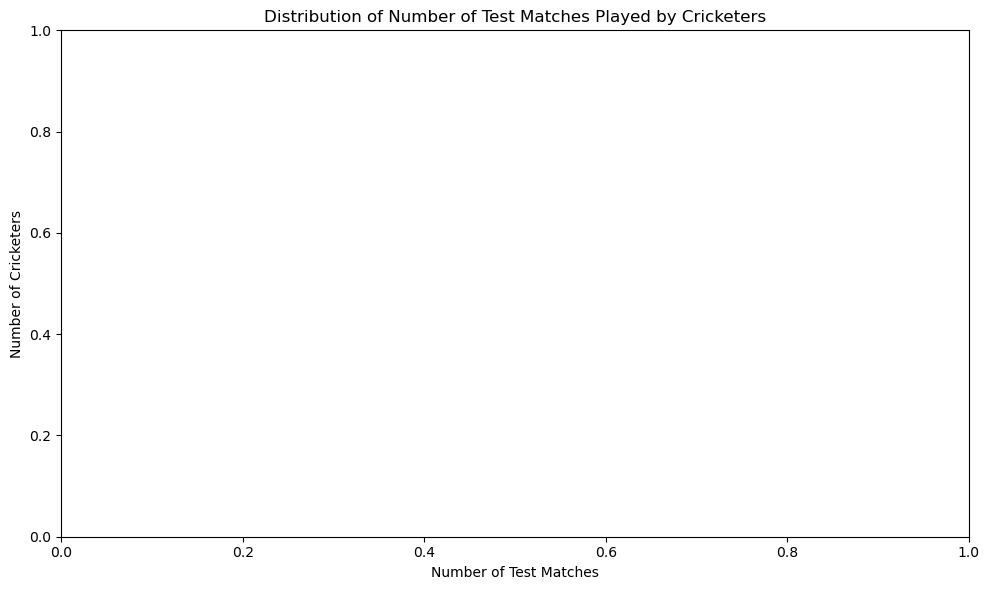

In [106]:
# Plot 1: Distribution of Number of Test Matches Played by Cricketers
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))
df['Mat'] = pd.to_numeric(df['Mat'], errors='coerce')  # Ensure 'Mat' is numeric
sns.histplot(df['Mat'].dropna(), bins=30, kde=True)  # KDE adds a smooth curve
plt.title('Distribution of Number of Test Matches Played by Cricketers')
plt.xlabel('Number of Test Matches')
plt.ylabel('Number of Cricketers')
plt.tight_layout()
plt.show()


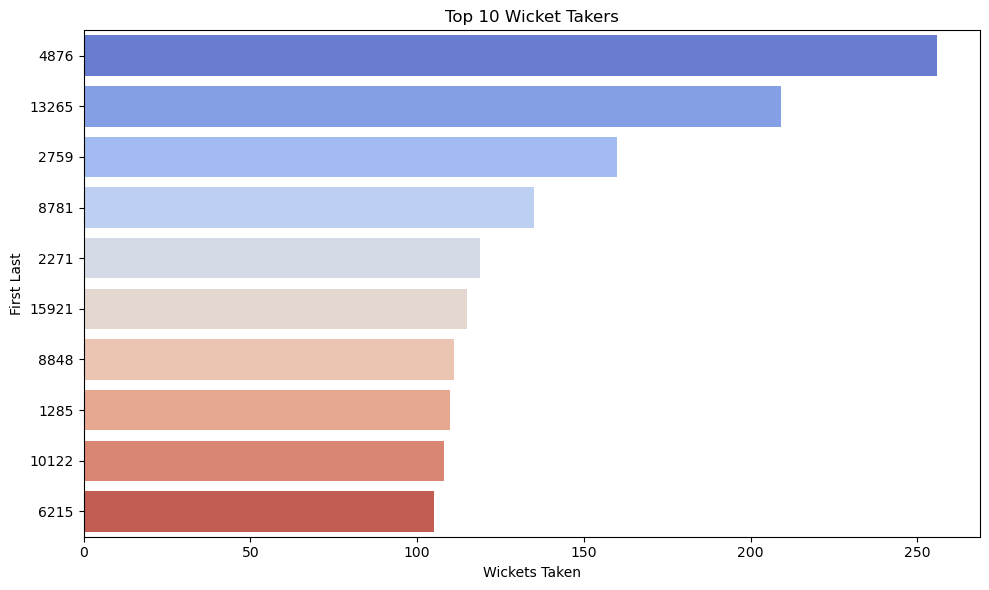

In [107]:
# Plot 3: Top 10 Wicket Takers
df['Wkt'] = pd.to_numeric(df['Wkt'], errors='coerce')
top_wicket_takers = df.nlargest(10, 'Wkt')

plt.figure(figsize=(10, 6))
sns.barplot(x='Wkt', y='Name', data=top_wicket_takers, palette='coolwarm')
plt.title('Top 10 Wicket Takers')
plt.xlabel('Wickets Taken')
plt.ylabel('First Last')
plt.tight_layout()
plt.show()


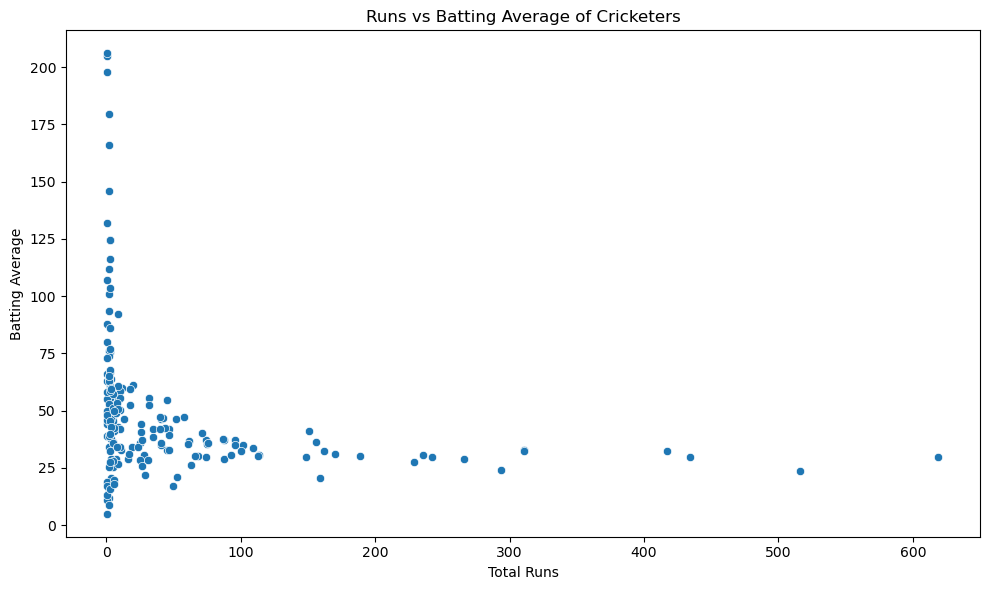

In [108]:
# Plot 2: Runs vs Batting Average
plt.figure(figsize=(10, 6))
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')
df['Avg'] = pd.to_numeric(df['Avg'], errors='coerce')

sns.scatterplot(x='Runs', y='Avg', data=df)
plt.title('Runs vs Batting Average of Cricketers')
plt.xlabel('Total Runs')
plt.ylabel('Batting Average')
plt.tight_layout()
plt.show()


In [109]:
df

,Indian Test cricketers,Batting,Bowling,Fielding,Cap,Name,First,Last,Mat,Runs,HS,Avg,100/50,Wkt,BBI,Ave,5/10 wicket,Ca,St
0,None,None,None,None,None,None,None,None,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None
1,1,Amar Singh,1932,1936,7,292,51,22.46,NaN,28.0,7/86,30.64,2/0,3.0,0,None,None,None,None
2,2,Sorabji Colah,1932,1933,2,69,31,17.25,NaN,NaN,-,NaN,-/-,2.0,0,None,None,None,None
3,3,Jahangir Khan,1932,1936,4,39,13,5.57,NaN,4.0,4/60,63.75,0/0,4.0,0,None,None,None,None
4,4,Lall Singh,1932,1932,1,44,29,22.00,NaN,NaN,-,NaN,-/-,1.0,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,310,Rajat Patidar,2024,2024,3,63,32,10.50,NaN,NaN,–,NaN,–,4.0,0,None,None,None,None
311,311,Sarfaraz Khan,2024,2024,3,200,62,50.00,NaN,NaN,–,NaN,–,3.0,0,None,None,None,None
312,312,Dhruv Jurel,2024,2024,3,190,90,63.33,NaN,NaN,–,NaN,–,5.0,2,None,None,None,None
313,313,Akash Deep,2024,2024,1,9,9,9.00,NaN,3.0,3/83,27.66,0/0,0.0,0,None,None,None,None


In [110]:
#Step 1 Handle missing values 
#Fill missing numerical values with 0 
df.fillna(0, inplace = True) # you can aslo choose df.dropan() if missing data is problem

In [111]:
df.head()

,Indian Test cricketers,Batting,Bowling,Fielding,Cap,Name,First,Last,Mat,Runs,HS,Avg,100/50,Wkt,BBI,Ave,5/10 wicket,Ca,St
0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.00,0,0.0,0,0,0,0,0
1,1,Amar Singh,1932,1936,7,292,51,22.46,0.0,28.0,7/86,30.64,2/0,3.0,0,0,0,0,0
2,2,Sorabji Colah,1932,1933,2,69,31,17.25,0.0,0.0,-,0.00,-/-,2.0,0,0,0,0,0
3,3,Jahangir Khan,1932,1936,4,39,13,5.57,0.0,4.0,4/60,63.75,0/0,4.0,0,0,0,0,0
4,4,Lall Singh,1932,1932,1,44,29,22.00,0.0,0.0,-,0.00,-/-,1.0,0,0,0,0,0


In [112]:
df.replace('-', 0, inplace = True) # Replace dashes with 0 (assuming it represnts missing data)

In [113]:
df.head()

,Indian Test cricketers,Batting,Bowling,Fielding,Cap,Name,First,Last,Mat,Runs,HS,Avg,100/50,Wkt,BBI,Ave,5/10 wicket,Ca,St
0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.00,0,0.0,0,0,0,0,0
1,1,Amar Singh,1932,1936,7,292,51,22.46,0.0,28.0,7/86,30.64,2/0,3.0,0,0,0,0,0
2,2,Sorabji Colah,1932,1933,2,69,31,17.25,0.0,0.0,0,0.00,-/-,2.0,0,0,0,0,0
3,3,Jahangir Khan,1932,1936,4,39,13,5.57,0.0,4.0,4/60,63.75,0/0,4.0,0,0,0,0,0
4,4,Lall Singh,1932,1932,1,44,29,22.00,0.0,0.0,0,0.00,-/-,1.0,0,0,0,0,0


In [114]:
df.replace('-/-', 0, inplace = True)

In [115]:
df.head()

,Indian Test cricketers,Batting,Bowling,Fielding,Cap,Name,First,Last,Mat,Runs,HS,Avg,100/50,Wkt,BBI,Ave,5/10 wicket,Ca,St
0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.00,0,0.0,0,0,0,0,0
1,1,Amar Singh,1932,1936,7,292,51,22.46,0.0,28.0,7/86,30.64,2/0,3.0,0,0,0,0,0
2,2,Sorabji Colah,1932,1933,2,69,31,17.25,0.0,0.0,0,0.00,0,2.0,0,0,0,0,0
3,3,Jahangir Khan,1932,1936,4,39,13,5.57,0.0,4.0,4/60,63.75,0/0,4.0,0,0,0,0,0
4,4,Lall Singh,1932,1932,1,44,29,22.00,0.0,0.0,0,0.00,0,1.0,0,0,0,0,0


In [116]:
# Step 2: Convert data types 
#Convert Colonms to their appropriate data types 
df['Mat'] = pd.to_numeric(df['Mat'], errors='coerce')  # Matches played

In [117]:
df.head()

,Indian Test cricketers,Batting,Bowling,Fielding,Cap,Name,First,Last,Mat,Runs,HS,Avg,100/50,Wkt,BBI,Ave,5/10 wicket,Ca,St
0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.00,0,0.0,0,0,0,0,0
1,1,Amar Singh,1932,1936,7,292,51,22.46,0.0,28.0,7/86,30.64,2/0,3.0,0,0,0,0,0
2,2,Sorabji Colah,1932,1933,2,69,31,17.25,0.0,0.0,0,0.00,0,2.0,0,0,0,0,0
3,3,Jahangir Khan,1932,1936,4,39,13,5.57,0.0,4.0,4/60,63.75,0/0,4.0,0,0,0,0,0
4,4,Lall Singh,1932,1932,1,44,29,22.00,0.0,0.0,0,0.00,0,1.0,0,0,0,0,0


In [118]:
df.describe()

,Mat,Runs,Avg,Wkt,Ave,5/10 wicket,Ca,St
count,315.0,315.000000,315.000000,315.000000,315.0,315.0,315.0,315.0
mean,0.0,26.758730,28.116286,15.250794,0.0,0.0,0.0,0.0
std,0.0,73.474933,35.408262,30.303202,0.0,0.0,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0
50%,0.0,1.000000,25.810000,4.000000,0.0,0.0,0.0,0.0
75%,0.0,10.000000,42.940000,14.500000,0.0,0.0,0.0,0.0
max,0.0,619.000000,206.000000,256.000000,0.0,0.0,0.0,0.0


In [119]:
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce') 

In [120]:
df['Avg'] = pd.to_numeric(df['Avg'], errors = 'coerce')

In [121]:
df['Wkt'] = pd.to_numeric(df['Wkt'], errors = 'coerce')

In [122]:
df['BBI'] = df['BBI'].astype(str) # Best bowling inning (can stay as string)

In [123]:
df['Ave'] = pd.to_numeric(df['Ave'], errors = 'coerce')

In [124]:
df['First'] = pd.to_datetime(df['First'], errors = 'coerce')

In [125]:
df['Last'] = pd.to_datetime(df['Last'], errors = 'coerce')

In [126]:
# stap 3: Remove Special Characters
#Strip extra characters or symbols from any string fields(if applicable)
df['HS'] = df['HS'].str.replace('*','') # Remove "*" from 'HS (Highest score)'

C:\Users\vijay\AppData\Local\Temp\ipykernel_9120\296474275.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['HS'] = df['HS'].str.replace('*','') # Remove "*" from 'HS (Highest score)'


In [127]:
#Step 4: Strip Whitespace 
#Remove extra whitespace from any string fields
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [128]:
#Stap: Remove Dublicate
#Drop duplicate rows if any (useful if the data source has redundancy)
df.drop_duplicates(inplace = True)

In [129]:
#Stape 6: Reset the index after cleaning (optional)
df.reset_index(drop=True, inplace=True)

In [130]:
#Verify Cleaned data types and first few rows
print(df.dtypes)

Indian Test cricketers            object
Batting                           object
Bowling                           object
Fielding                          object
Cap                               object
Name                              object
First                     datetime64[ns]
Last                      datetime64[ns]
Mat                              float64
Runs                             float64
HS                                object
Avg                              float64
100/50                            object
Wkt                              float64
BBI                               object
Ave                                int64
5/10 wicket                        int64
Ca                                 int64
St                                 int64
dtype: object


In [131]:
print(df.head())

  Indian Test cricketers        Batting Bowling Fielding  Cap Name      First  \
0                    NaN            NaN     NaN      NaN  NaN  NaN 1970-01-01   
1                      1     Amar Singh    1932     1936    7  292        NaT   
2                      2  Sorabji Colah    1932     1933    2   69        NaT   
3                      3  Jahangir Khan    1932     1936    4   39        NaT   
4                      4     Lall Singh    1932     1932    1   44        NaT   

        Last  Mat  Runs    HS    Avg 100/50  Wkt BBI  Ave  5/10 wicket  Ca  St  
0 1970-01-01  0.0   0.0   NaN   0.00    NaN  0.0   0    0            0   0   0  
1        NaT  0.0  28.0  7/86  30.64    2/0  3.0   0    0            0   0   0  
2        NaT  0.0   0.0   NaN   0.00    NaN  2.0   0    0            0   0   0  
3        NaT  0.0   4.0  4/60  63.75    0/0  4.0   0    0            0   0   0  
4        NaT  0.0   0.0   NaN   0.00    NaN  1.0   0    0            0   0   0  


In [132]:
df.head()

,Indian Test cricketers,Batting,Bowling,Fielding,Cap,Name,First,Last,Mat,Runs,HS,Avg,100/50,Wkt,BBI,Ave,5/10 wicket,Ca,St
0,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,1970-01-01,0.0,0.0,NaN,0.00,NaN,0.0,0,0,0,0,0
1,1,Amar Singh,1932,1936,7,292,NaT,NaT,0.0,28.0,7/86,30.64,2/0,3.0,0,0,0,0,0
2,2,Sorabji Colah,1932,1933,2,69,NaT,NaT,0.0,0.0,NaN,0.00,NaN,2.0,0,0,0,0,0
3,3,Jahangir Khan,1932,1936,4,39,NaT,NaT,0.0,4.0,4/60,63.75,0/0,4.0,0,0,0,0,0
4,4,Lall Singh,1932,1932,1,44,NaT,NaT,0.0,0.0,NaN,0.00,NaN,1.0,0,0,0,0,0


In [133]:
df

,Indian Test cricketers,Batting,Bowling,Fielding,Cap,Name,First,Last,Mat,Runs,HS,Avg,100/50,Wkt,BBI,Ave,5/10 wicket,Ca,St
0,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,1970-01-01,0.0,0.0,NaN,0.00,NaN,0.0,0,0,0,0,0
1,1,Amar Singh,1932,1936,7,292,NaT,NaT,0.0,28.0,7/86,30.64,2/0,3.0,0,0,0,0,0
2,2,Sorabji Colah,1932,1933,2,69,NaT,NaT,0.0,0.0,NaN,0.00,NaN,2.0,0,0,0,0,0
3,3,Jahangir Khan,1932,1936,4,39,NaT,NaT,0.0,4.0,4/60,63.75,0/0,4.0,0,0,0,0,0
4,4,Lall Singh,1932,1932,1,44,NaT,NaT,0.0,0.0,NaN,0.00,NaN,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,310,Rajat Patidar,2024,2024,3,63,NaT,NaT,0.0,0.0,–,0.00,–,4.0,0,0,0,0,0
311,311,Sarfaraz Khan,2024,2024,3,200,NaT,NaT,0.0,0.0,–,0.00,–,3.0,0,0,0,0,0
312,312,Dhruv Jurel,2024,2024,3,190,NaT,NaT,0.0,0.0,–,0.00,–,5.0,2,0,0,0,0
313,313,Akash Deep,2024,2024,1,9,NaT,NaT,0.0,3.0,3/83,27.66,0/0,0.0,0,0,0,0,0


In [134]:
print(df.describe())

         Mat        Runs         Avg         Wkt    Ave  5/10 wicket     Ca  \
count  315.0  315.000000  315.000000  315.000000  315.0        315.0  315.0   
mean     0.0   26.758730   28.116286   15.250794    0.0          0.0    0.0   
std      0.0   73.474933   35.408262   30.303202    0.0          0.0    0.0   
min      0.0    0.000000    0.000000    0.000000    0.0          0.0    0.0   
25%      0.0    0.000000    0.000000    1.000000    0.0          0.0    0.0   
50%      0.0    1.000000   25.810000    4.000000    0.0          0.0    0.0   
75%      0.0   10.000000   42.940000   14.500000    0.0          0.0    0.0   
max      0.0  619.000000  206.000000  256.000000    0.0          0.0    0.0   

          St  
count  315.0  
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0  


In [137]:
#Save cleaned data to a csv file
df.to_csv('cleaned_cricketer_data.csv', index=False) #Index = False " to avoid saving the as index as a column"

In [141]:
df.to_csv('D:/Project of DS/Extract and Analyze Cricketer Data from Wikipedia/cleaned_cricketer_data.csv', index = False)

In [139]:
df.to_json('cleaned_cricketer_data.json', orient='records', lines=True)

In [140]:
df.to_json('D:/Project of DS/Extract and Analyze Cricketer Data from Wikipedia/cleaned_cricketer_data.json', orient = 'records', lines = True)

Histogram: Visualizing the Distribution of a numeric column

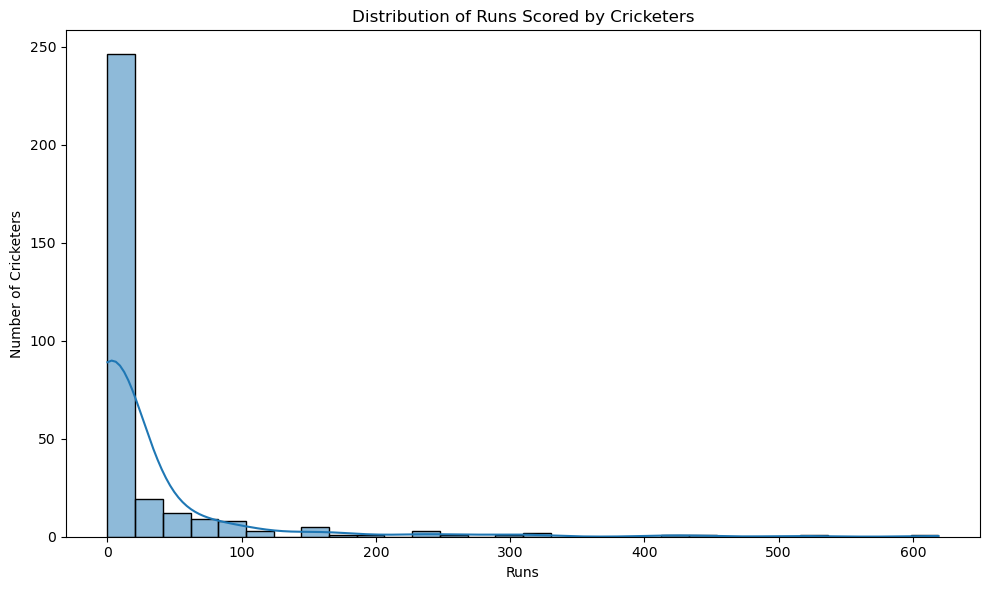

In [144]:
# Distribution of runs scored by cricketers
plt.figure(figsize=(10, 6))
sns.histplot(df['Runs'].dropna(), bins=30, kde=True)
plt.title('Distribution of Runs Scored by Cricketers')
plt.xlabel('Runs')
plt.ylabel('Number of Cricketers')
plt.tight_layout()
plt.show()

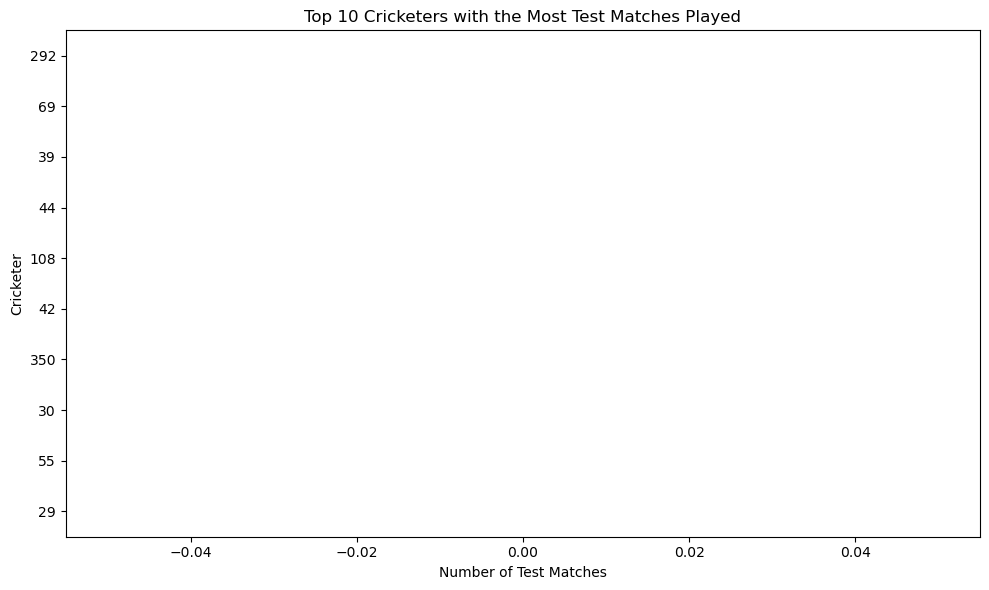

In [146]:
# Bar plot for the top 10 cricketers with the most Test matches played
top_10_mat = df[['Name', 'Mat']].dropna().nlargest(10, 'Mat')
plt.figure(figsize=(10, 6))
sns.barplot(x='Mat', y='Name', data=top_10_mat, palette='coolwarm')
plt.title('Top 10 Cricketers with the Most Test Matches Played')
plt.xlabel('Number of Test Matches')
plt.ylabel('Cricketer')
plt.tight_layout()
plt.show()

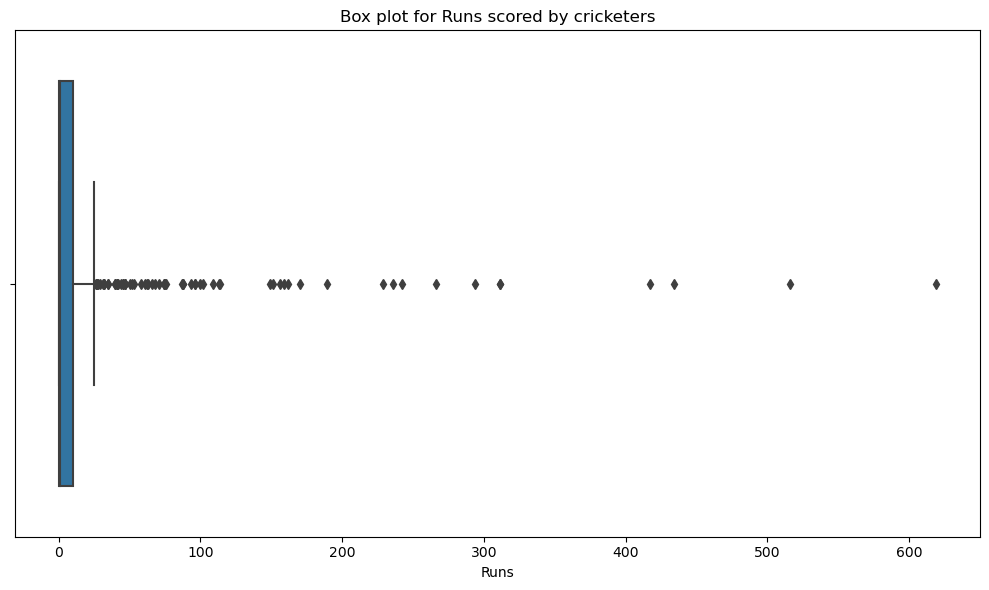

In [149]:
#box plot for Runs 
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Runs'].dropna())
plt.title('Box plot for Runs scored by cricketers')
plt.xlabel('Runs')
plt.tight_layout()
plt.show()

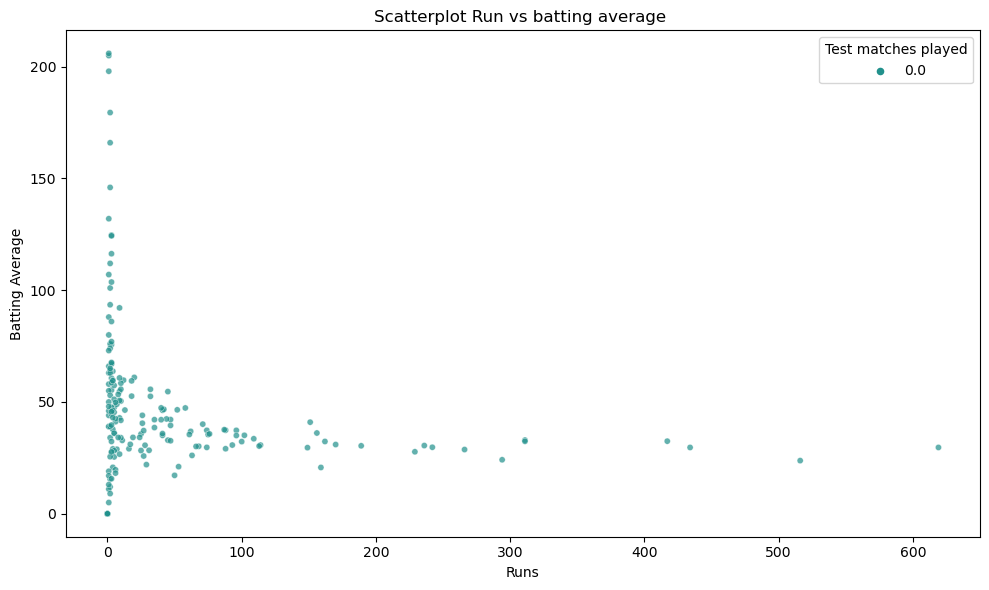

In [159]:
#Scatter plot: Relationship between runs and batting average
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Runs', y= 'Avg', data = df, hue = 'Mat', palette='viridis', size = 'Mat', sizes=(20,200),alpha=0.7)
plt.title('Scatterplot Run vs batting average ')
plt.xlabel('Runs')
plt.ylabel('Batting Average')
plt.legend(title = 'Test matches played')
plt.tight_layout()
plt.show()
